# **Introduction**

this notebook implements psychological analysis on health care workers during the time of pandemic


**Data Description:**

*   ***psych_data.csv***: contains the data used
*   each row represent a healthcare worker
*   ***SCL_Label***: this is a target variable it was calculated using SCL-90 psychological scale by a researcher. this column consists of 2 classes **High** and **Low**
*   Rest of the features are based on social and demographic informtion of healthcare workers




**Goal:** Predict the likelihood of psychological impact on healthcare worker

# **Exploratory Data Analysis and Preprocessing**

In [211]:
import pandas as pd

# Load the dataset
file_path = 'Research data.csv'
data = pd.read_csv(file_path)

# Display basic information about the dataset
data_info = {
    "Columns": data.columns.tolist(),
    "Shape": data.shape,
    "Data Types": data.dtypes,
    "Missing Values": data.isnull().sum()
}

# Display the initial rows of the dataset for inspection
data_head = data.head()

data_info, data_head

({'Columns': ['Number',
   'Age',
   'Sex',
   'The only child',
   'Place of residence',
   'Town or country',
   'Education',
   'Occupation',
   'Post',
   'Working years',
   'Marital status',
   'Have minor children or not',
   'Whether the minor child is an only child',
   'Primary caregiver for children',
   'Primary caregiver for elderly parents',
   'Work units nature',
   'Title',
   'Employment type',
   'Monthly income',
   'Annual family income',
   'Changes in work intensity',
   'Working hours per week',
   'Usual sleep time',
   'Resting place',
   'Have COVID-19 patients or not in the workplace',
   'In close contact with COVID-19 patients in the workplace',
   'Have COVID-19 patients or not in the living place',
   'The work unit is a designated treatment point or not',
   'Satisfaction level with the protective measures',
   'Psychological training',
   'Chronic disease',
   'Current job is supported by family',
   'Frequency of exercise',
   '1',
   '2',
   '3',
   

The dataset contains 5108 rows and 123 columns. Here's an overview:

Columns: Includes demographic, employment, lifestyle variables, and 90 psychological items from the SCL-90 inventory.

Missing Values: No missing values are present.

Initial Rows: A preview of the data shows categorical and numeric variables.

In [212]:
import matplotlib.pyplot as plt
import seaborn as sns

# Descriptive statistics for numeric columns
numeric_columns = data.select_dtypes(include=['int64', 'float64']).columns
descriptive_stats = data[numeric_columns].describe()

# Categorical columns for visualization
categorical_columns = [
    "Sex", "Town or country", "Education", "Marital status", 
    "Chronic disease", "Occupation", "Post", "Changes in work intensity"
]

descriptive_stats


,Number,Age,Sex,The only child,Place of residence,Town or country,Education,Occupation,Post,Working years,...,81,82,83,84,85,86,87,88,89,90
count,5108.000000,5108.000000,5108.000000,5108.000000,5108.000000,5108.000000,5108.000000,5108.000000,5108.000000,5108.000000,...,5108.000000,5108.000000,5108.000000,5108.000000,5108.000000,5108.000000,5108.000000,5108.000000,5108.000000,5108.000000
mean,2554.500000,38.433634,1.755286,1.706930,8.668559,1.217502,2.933438,3.956147,1.577525,14.214565,...,1.100039,1.112569,1.099648,1.115701,1.205560,1.478074,1.318520,1.190290,1.091425,1.198316
std,1474.696918,9.563025,0.429960,0.455215,4.873932,0.412587,0.898334,1.402826,0.494002,10.752906,...,0.442920,0.459922,0.419395,0.453134,0.570498,0.886394,0.751054,0.573386,0.427722,0.619206
min,1.000000,18.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,1277.750000,30.000000,2.000000,1.000000,4.000000,1.000000,2.000000,3.000000,1.000000,5.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
50%,2554.500000,38.000000,2.000000,2.000000,11.000000,1.000000,3.000000,4.000000,2.000000,10.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
75%,3831.250000,46.000000,2.000000,2.000000,13.000000,1.000000,4.000000,5.000000,2.000000,23.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000,1.000000,1.000000,1.000000,1.000000
max,5108.000000,73.000000,2.000000,2.000000,15.000000,2.000000,5.000000,6.000000,2.000000,50.000000,...,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000


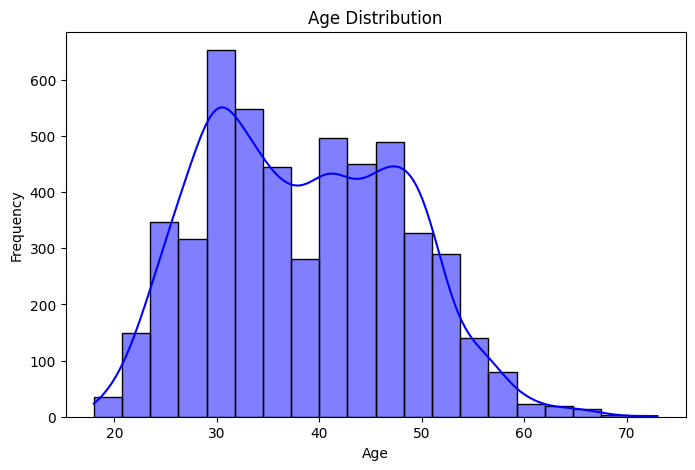

/var/folders/mf/6c6r69vs6xb7_882kknxt6wh0000gs/T/ipykernel_59901/1900625648.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=gender_counts.index, y=gender_counts.values, palette="viridis")


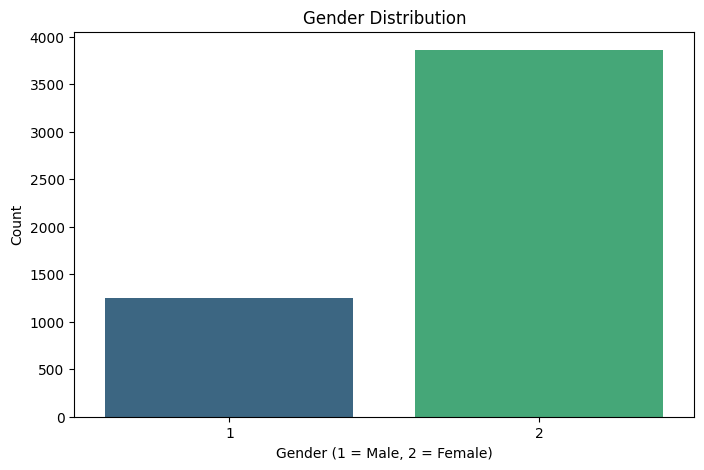

/var/folders/mf/6c6r69vs6xb7_882kknxt6wh0000gs/T/ipykernel_59901/1900625648.py:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=education_counts.index, y=education_counts.values, palette="coolwarm")


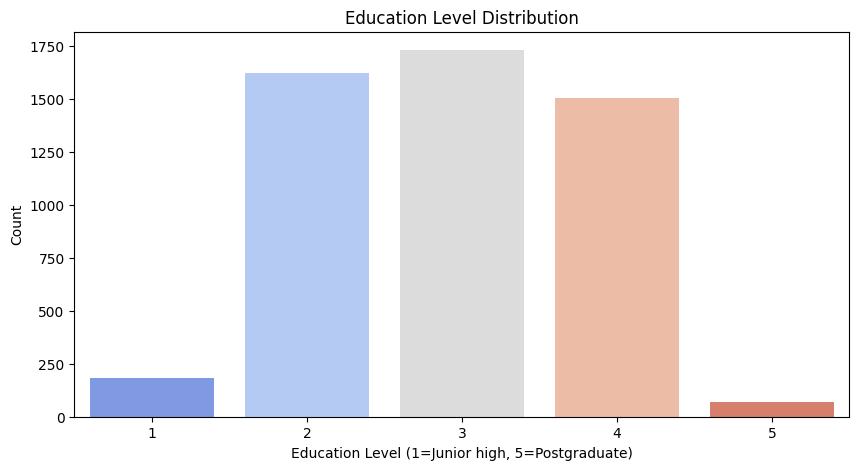

In [213]:
# Distribution of Age
plt.figure(figsize=(8, 5))
sns.histplot(data['Age'], kde=True, bins=20, color="blue")
plt.title("Age Distribution")
plt.xlabel("Age")
plt.ylabel("Frequency")
plt.show()

# Gender distribution
plt.figure(figsize=(8, 5))
gender_counts = data['Sex'].value_counts()
sns.barplot(x=gender_counts.index, y=gender_counts.values, palette="viridis")
plt.title("Gender Distribution")
plt.xlabel("Gender (1 = Male, 2 = Female)")
plt.ylabel("Count")
plt.show()

# Distribution of Education Levels
plt.figure(figsize=(10, 5))
education_counts = data['Education'].value_counts()
sns.barplot(x=education_counts.index, y=education_counts.values, palette="coolwarm")
plt.title("Education Level Distribution")
plt.xlabel("Education Level (1=Junior high, 5=Postgraduate)")
plt.ylabel("Count")
plt.show()



<b> Descriptive Statistics:</b>

Age ranges from 18 to 73, with a mean of ~38 years.

Working years have a wide range, with a mean of ~14 years.

Psychological measures (SCL-90 variables) generally cluster at the lower end, with most responses indicating low levels of distress.

<b>Visualizations:</b>

Age Distribution: The majority of participants are in their 30s and 40s.

Gender Distribution: More females (label 2) than males (label 1).

Education Levels: Most participants have college or university-level education.

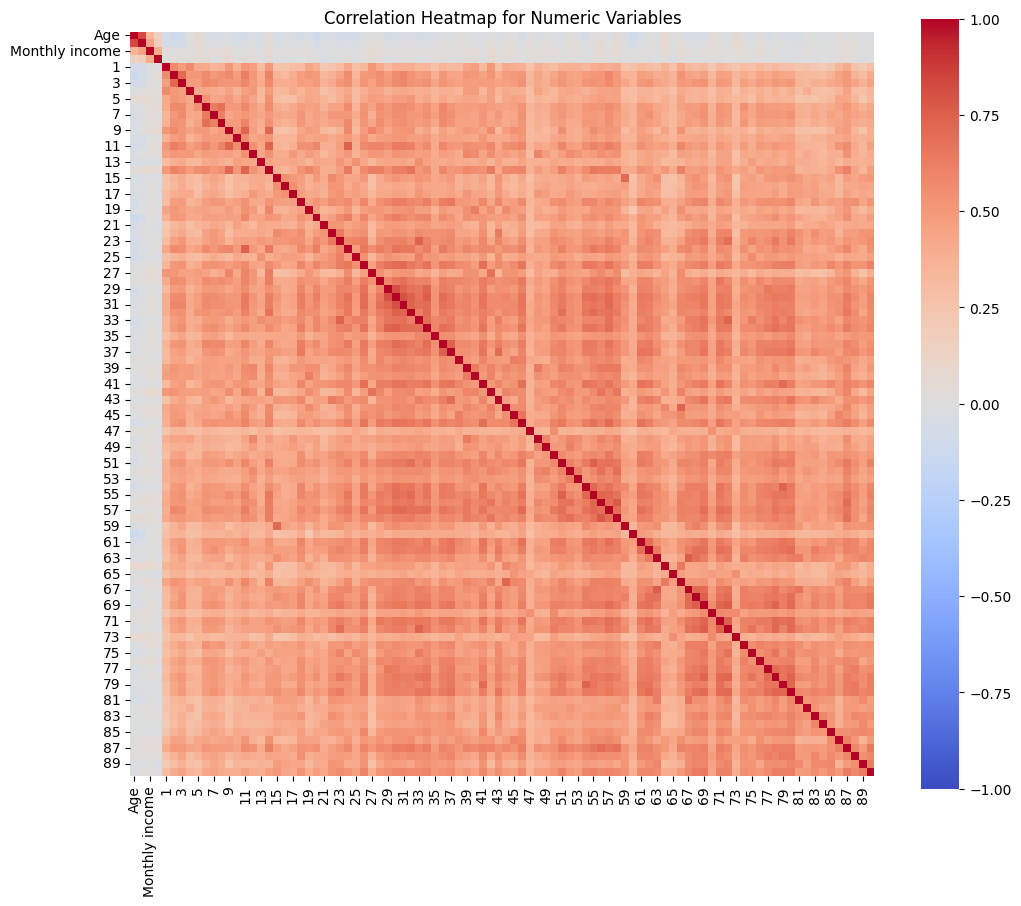

In [214]:
# Heatmap for correlations among selected variables
correlation_columns = ['Age', 'Working years', 'Monthly income', 'Annual family income'] + [str(i) for i in range(1, 91)]
correlation_matrix = data[correlation_columns].corr()

plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, cmap='coolwarm', vmin=-1, vmax=1, square=True, cbar=True, annot=False)
plt.title("Correlation Heatmap for Numeric Variables")
plt.show()

Strong correlations are not evident in the heatmap between demographic and psychological variables, though deeper exploration could uncover relationships.

# SCL_Label

In [215]:
data = pd.read_csv('Research data.csv')

# Identify columns to rename (33 to 122)
scl_columns = [f"SCL_{i:02}" for i in range(1, 91)]  # Generate SCL_01, SCL_02, ..., SCL_90
original_columns = list(data.columns)  # Keep the original columns list
columns_to_rename = original_columns[33:123]  # Columns from position 33 to 122

# Create a mapping for the columns to rename
column_mapping = {original_columns[33 + i]: scl_columns[i] for i in range(len(columns_to_rename))}

# Rename the columns in the dataset
data.rename(columns=column_mapping, inplace=True)

#### GSI was selected for overall psychological symptoms in this study which corresponds to psychological distress. 
#### In this scale for each record these psychological features are summed and averaged. 
#### Then this average score is converted into T-score using a mean of 50 and standard deviation of 10. 
#### All participants having T-score >= 63 are considered to have higher distress level and rest were considered at low distress level

/var/folders/mf/6c6r69vs6xb7_882kknxt6wh0000gs/T/ipykernel_59901/2451810974.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=scl_label_counts.index, y=scl_label_counts.values, palette="pastel")


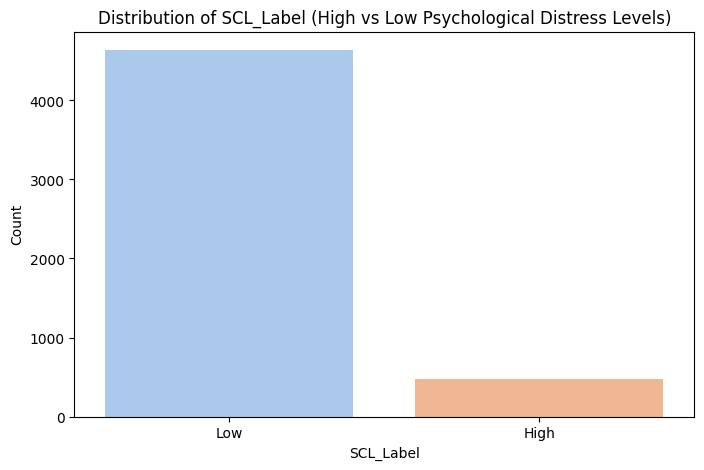

In [216]:
# Calculate new features
scl_feature_columns = scl_columns  # The renamed SCL columns
data['SCL_Sum'] = data[scl_feature_columns].sum(axis=1)  # Sum of SCL_01 to SCL_90
data['GSI'] = data['SCL_Sum'] / 90  # Average score across SCL columns
data['SCL_ZScore'] = (data['GSI'] - data['GSI'].mean()) / data['GSI'].std()  # Z-Score
data['SCL_TScore'] = (data['SCL_ZScore'] * 10) + 50  # T-Score
data['SCL_Label'] = data['SCL_TScore'].apply(lambda x: 'High' if x >= 63 else 'Low')  # High/Low distress

# Set index to 'Number' and drop specified columns
data.set_index('Number', inplace=True)
features_to_drop = ['SCL_Sum', 'SCL_ZScore', 'SCL_TScore', 'GSI', 'Place of residence', 'Employment type']
data = data.drop(columns=features_to_drop)

# Plot SCL_Label distribution
plt.figure(figsize=(8, 5))
scl_label_counts = data['SCL_Label'].value_counts()
sns.barplot(x=scl_label_counts.index, y=scl_label_counts.values, palette="pastel")
plt.title("Distribution of SCL_Label (High vs Low Psychological Distress Levels)")
plt.xlabel("SCL_Label")
plt.ylabel("Count")
plt.show()


**Exploring different psychological issues w.r.t two classes**

In [217]:
data_copy = pd.read_csv('Research data.csv')
data_copy

,Number,Age,Sex,The only child,Place of residence,Town or country,Education,Occupation,Post,Working years,...,81,82,83,84,85,86,87,88,89,90
0,1,18,2,2,11,1,2,4,1,1,...,1,1,1,1,1,2,1,1,1,1
1,2,18,2,1,13,1,2,4,2,1,...,1,1,1,1,1,1,1,1,1,1
2,3,19,2,1,4,1,2,6,2,1,...,3,4,3,1,4,5,4,4,3,5
3,4,19,2,2,3,1,2,4,2,1,...,1,1,1,1,1,1,1,1,1,1
4,5,19,2,2,13,2,2,4,2,1,...,3,4,4,4,4,4,4,4,4,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5103,5104,66,2,2,4,1,3,3,2,46,...,1,1,1,1,1,1,1,1,1,1
5104,5105,66,2,2,8,1,4,3,1,47,...,1,1,1,1,1,2,1,1,1,1
5105,5106,65,1,2,11,1,2,3,1,48,...,1,1,1,1,1,1,1,1,1,1
5106,5107,68,2,2,3,1,3,4,1,48,...,1,1,1,1,1,1,1,1,1,1


In [218]:
# Complete mapping for all 90 SCL variables
full_column_mapping = {
    "1": "Headaches (SOM)",
    "2": "Nervousness or shakiness inside (ANX)",
    "3": "Unwanted thoughts or ideas that won’t leave your head (OC)",
    "4": "Faintness or dizziness (SOM)",
    "5": "Loss of sexual interest or pleasure (DEP)",
    "6": "Feeling critical of others (IS)",
    "7": "The idea that someone else can control your thoughts (PSY)",
    "8": "Feeling others are to blame for most of your troubles (PI)",
    "9": "Trouble remembering things (OC)",
    "10": "Worried about sloppiness or carelessness (OC)",
    "11": "Feeling easily annoyed or irritated (ANG-HOS)",
    "12": "Pains in heart or chest (SOM)",
    "13": "Feeling afraid in open spaces or on the street (PHOB)",
    "14": "Feeling low in energy or slowed down (DEP)",
    "15": "Thoughts of ending life (DEP)",
    "16": "Hearing voices that other people do not hear (PSY)",
    "17": "Trembling (ANX)",
    "18": "Feeling that most people cannot be trusted (PI)",
    "19": "Poor appetite (DEP)",
    "20": "Crying easily (DEP)",
    "21": "Feeling shy or uneasy with the opposite sex (IS)",
    "22": "Feeling of being trapped or caught (DEP)",
    "23": "Suddenly scared for no reason (ANX)",
    "24": "Temper outbursts that you could not control (ANG-HOS)",
    "25": "Feeling afraid to go out of your house alone (PHOB)",
    "26": "Blaming yourself for things (DEP)",
    "27": "Pains in lower back (SOM)",
    "28": "Feeling blocked in getting things done (OC)",
    "29": "Feeling lonely (DEP)",
    "30": "Feeling blue (DEP)",
    "31": "Worrying too much about things (DEP)",
    "32": "Feeling no interest in things (DEP)",
    "33": "Feeling fearful (ANX)",
    "34": "Your feelings being easily hurt (IS)",
    "35": "Other people being aware of your private thoughts (PSY)",
    "36": "Feeling others do not understand you or are unsympathetic (IS)",
    "37": "Feeling that people are unfriendly (IS)",
    "38": "Having to do things very slowly (OC)",
    "39": "Heart pounding or racing (ANX)",
    "40": "Nausea or upset stomach (SOM)",
    "41": "Feeling inferior to others (IS)",
    "42": "Soreness of your muscles (SOM)",
    "43": "Feeling that you are watched or talked about by others (PI)",
    "44": "Trouble falling asleep (DEP)",
    "45": "Having to check and double check what you do (OC)",
    "46": "Difficulty making decisions (OC)",
    "47": "Feeling afraid to travel on buses, subways or trains (PHOB)",
    "48": "Trouble getting your breath (SOM)",
    "49": "Hot or cold spells (SOM)",
    "50": "Having to avoid certain things, places or activities (PHOB)",
    "51": "Your mind going blank (OC)",
    "52": "Numbness or tingling in parts of your body (SOM)",
    "53": "A lump in your throat (SOM)",
    "54": "Feeling hopeless about the future (DEP)",
    "55": "Trouble concentrating (OC)",
    "56": "Feeling weak in parts of your body (SOM)",
    "57": "Feeling tense or keyed up (ANX)",
    "58": "Heavy feelings in your arms or legs (SOM)",
    "59": "Thoughts of death or dying (DEP)",
    "60": "Overeating (DEP)",
    "61": "Feeling uneasy when people are watching or talking about you (IS)",
    "62": "Having thoughts that are not your own (PSY)",
    "63": "Having urges to beat, injure or harm someone (ANG-HOS)",
    "64": "Awakening in the early morning (DEP)",
    "65": "Having to repeat the same actions such as touching, counting, washing (OC)",
    "66": "Sleep that is restless or disturbed (DEP)",
    "67": "Having urges to break or smash things (ANG-HOS)",
    "68": "Having ideas or beliefs that others do not share (PI)",
    "69": "Feeling very self-conscious with others (IS)",
    "70": "Feeling uneasy in crowds such as shopping or at a movie (PHOB)",
    "71": "Feeling everything is an effort (DEP)",
    "72": "Spells of terror or panic (ANX)",
    "73": "Feeling uncomfortable about eating or drinking in public (IS)",
    "74": "Getting into frequent arguments (ANG-HOS)",
    "75": "Feeling nervous when you are left alone (PHOB)",
    "76": "Others not giving you proper credit for your achievements (PI)",
    "77": "Feeling lonely even when you are with people (PSY)",
    "78": "Feeling so restless you couldn’t sit still (ANX)",
    "79": "Feeling of worthlessness (DEP)",
    "80": "Feeling that familiar things are strange or unreal (ANX)",
    "81": "Shouting or throwing things (ANG-HOS)",
    "82": "Feeling afraid you will faint in public (PHOB)",
    "83": "Feeling that people will take advantage of you if you let them (PI)",
    "84": "Having thoughts about sex that bother you a lot (PSY)",
    "85": "The idea that you should be punished for your sins (PSY)",
    "86": "Feeling pushed to get things done (ANX)",
    "87": "The idea that something serious is wrong with your body (PSY)",
    "88": "Never feeling close to another personal (PSY)",
    "89": "Feelings of guilt (DEP)",
    "90": "The idea that something is wrong with your mind (PSY)",
}

# Apply the renaming to the copied data
data_copy.rename(columns=full_column_mapping, inplace=True)

In [219]:
data_copy.columns.tolist()

['Number',
 'Age',
 'Sex',
 'The only child',
 'Place of residence',
 'Town or country',
 'Education',
 'Occupation',
 'Post',
 'Working years',
 'Marital status',
 'Have minor children or not',
 'Whether the minor child is an only child',
 'Primary caregiver for children',
 'Primary caregiver for elderly parents',
 'Work units nature',
 'Title',
 'Employment type',
 'Monthly income',
 'Annual family income',
 'Changes in work intensity',
 'Working hours per week',
 'Usual sleep time',
 'Resting place',
 'Have COVID-19 patients or not in the workplace',
 'In close contact with COVID-19 patients in the workplace',
 'Have COVID-19 patients or not in the living place',
 'The work unit is a designated treatment point or not',
 'Satisfaction level with the protective measures',
 'Psychological training',
 'Chronic disease',
 'Current job is supported by family',
 'Frequency of exercise',
 'Headaches (SOM)',
 'Nervousness or shakiness inside (ANX)',
 'Unwanted thoughts or ideas that won’t le

In [220]:
# Create composite categories as per user requirements
df_composite = pd.DataFrame()
df_composite['SOM'] = data_copy[[
    "Headaches (SOM)",
    "Faintness or dizziness (SOM)",
    "Pains in heart or chest (SOM)",
    "Pains in lower back (SOM)",
    "Nausea or upset stomach (SOM)",
    "Soreness of your muscles (SOM)",
    "Trouble getting your breath (SOM)",
    "Hot or cold spells (SOM)",
    "Numbness or tingling in parts of your body (SOM)",
    "A lump in your throat (SOM)",
    "Feeling weak in parts of your body (SOM)",
    "Heavy feelings in your arms or legs (SOM)"
]].mean(axis=1)

df_composite['ANX'] = data_copy[[
    "Nervousness or shakiness inside (ANX)",
    "Trembling (ANX)",
    "Suddenly scared for no reason (ANX)",
    "Feeling fearful (ANX)",
    "Heart pounding or racing (ANX)",
    "Feeling tense or keyed up (ANX)",
    "Spells of terror or panic (ANX)",
    "Feeling so restless you couldn’t sit still (ANX)",
    "Feeling that familiar things are strange or unreal (ANX)",
    "Feeling pushed to get things done (ANX)"
]].mean(axis=1)

# Repeat for other categories like OC, DEP, IS, PSY, PI, ANG_HOS, PHOB
df_composite['OC'] = data_copy[[
    "Unwanted thoughts or ideas that won’t leave your head (OC)",
    "Trouble remembering things (OC)",
    "Worried about sloppiness or carelessness (OC)",
    "Feeling blocked in getting things done (OC)",
    "Having to do things very slowly (OC)",
    "Difficulty making decisions (OC)",
    "Your mind going blank (OC)",
    "Trouble concentrating (OC)",
    "Having to repeat the same actions such as touching, counting, washing (OC)"
]].mean(axis=1)

In [221]:
# Continue with creating the remaining composite categories

# Interpersonal Sensitivity (IS)
df_composite['IS'] = data_copy[[
    "Feeling critical of others (IS)",
    "Feeling shy or uneasy with the opposite sex (IS)",
    "Your feelings being easily hurt (IS)",
    "Feeling others do not understand you or are unsympathetic (IS)",
    "Feeling that people are unfriendly (IS)",
    "Feeling inferior to others (IS)",
    "Feeling uneasy when people are watching or talking about you (IS)",
    "Feeling very self-conscious with others (IS)",
    "Feeling uncomfortable about eating or drinking in public (IS)"
]].mean(axis=1)

# Depression (DEP)
df_composite['DEP'] = data_copy[[
    "Loss of sexual interest or pleasure (DEP)",
    "Feeling low in energy or slowed down (DEP)",
    "Thoughts of ending life (DEP)",
    "Crying easily (DEP)",
    "Feeling of being trapped or caught (DEP)",
    "Blaming yourself for things (DEP)",
    "Feeling lonely (DEP)",
    "Feeling blue (DEP)",
    "Worrying too much about things (DEP)",
    "Feeling no interest in things (DEP)",
    "Feeling hopeless about the future (DEP)",
    "Thoughts of death or dying (DEP)",
    "Feeling everything is an effort (DEP)",
    "Feeling of worthlessness (DEP)"
]].mean(axis=1)

# Psychoticism (PSY)
df_composite['PSY'] = data_copy[[
    "The idea that someone else can control your thoughts (PSY)",
    "Hearing voices that other people do not hear (PSY)",
    "Other people being aware of your private thoughts (PSY)",
    "Having thoughts that are not your own (PSY)",
    "Feeling lonely even when you are with people (PSY)",
    "Having thoughts about sex that bother you a lot (PSY)",
    "The idea that you should be punished for your sins (PSY)",
    "The idea that something serious is wrong with your body (PSY)",
    "Never feeling close to another personal (PSY)",
    "The idea that something is wrong with your mind (PSY)"
]].mean(axis=1)

# Paranoid Ideation (PI)
df_composite['PI'] = data_copy[[
    "Feeling others are to blame for most of your troubles (PI)",
    "Feeling that most people cannot be trusted (PI)",
    "Feeling that you are watched or talked about by others (PI)",
    "Having ideas or beliefs that others do not share (PI)",
    "Others not giving you proper credit for your achievements (PI)",
    "Feeling that people will take advantage of you if you let them (PI)"
]].mean(axis=1)

# Anger-Hostility (ANG_HOS)
df_composite['ANG_HOS'] = data_copy[[
    "Feeling easily annoyed or irritated (ANG-HOS)",
    "Temper outbursts that you could not control (ANG-HOS)",
    "Having urges to beat, injure or harm someone (ANG-HOS)",
    "Having urges to break or smash things (ANG-HOS)",
    "Getting into frequent arguments (ANG-HOS)",
    "Shouting or throwing things (ANG-HOS)"
]].mean(axis=1)

# Phobic Anxiety (PHOB)
df_composite['PHOB'] = data_copy[[
    "Feeling afraid in open spaces or on the street (PHOB)",
    "Feeling afraid to go out of your house alone (PHOB)",
    "Feeling afraid to travel on buses, subways or trains (PHOB)",
    "Having to avoid certain things, places or activities (PHOB)",
    "Feeling uneasy in crowds such as shopping or at a movie (PHOB)",
    "Feeling nervous when you are left alone (PHOB)",
    "Feeling afraid you will faint in public (PHOB)"
]].mean(axis=1)

In [222]:
# Display the composite dataframe structure
df_composite.tail()


,SOM,ANX,OC,IS,DEP,PSY,PI,ANG_HOS,PHOB
5103,1.166667,1.0,1.111111,1.000000,1.000000,1.0,1.0,1.000000,1.000000
5104,1.583333,1.2,1.333333,1.333333,1.214286,1.0,1.0,1.333333,1.428571
5105,1.000000,1.0,1.000000,1.000000,1.000000,1.0,1.0,1.000000,1.000000
5106,1.000000,1.0,1.222222,1.000000,1.071429,1.0,1.0,1.000000,1.000000
5107,1.000000,1.0,1.111111,1.000000,1.000000,1.0,1.0,1.000000,1.000000


In [223]:
data

,Age,Sex,The only child,Town or country,Education,Occupation,Post,Working years,Marital status,Have minor children or not,...,SCL_82,SCL_83,SCL_84,SCL_85,SCL_86,SCL_87,SCL_88,SCL_89,SCL_90,SCL_Label
Number,,,,,,,,,,,,,,,,,,,,,
1,18,2,2,1,2,4,1,1,1,2,...,1,1,1,1,2,1,1,1,1,Low
2,18,2,1,1,2,4,2,1,1,2,...,1,1,1,1,1,1,1,1,1,Low
3,19,2,1,1,2,6,2,1,1,2,...,4,3,1,4,5,4,4,3,5,High
4,19,2,2,1,2,4,2,1,1,2,...,1,1,1,1,1,1,1,1,1,Low
5,19,2,2,2,2,4,2,1,1,2,...,4,4,4,4,4,4,4,4,4,High
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5104,66,2,2,1,3,3,2,46,2,2,...,1,1,1,1,1,1,1,1,1,Low
5105,66,2,2,1,4,3,1,47,2,2,...,1,1,1,1,2,1,1,1,1,Low
5106,65,1,2,1,2,3,1,48,2,2,...,1,1,1,1,1,1,1,1,1,Low


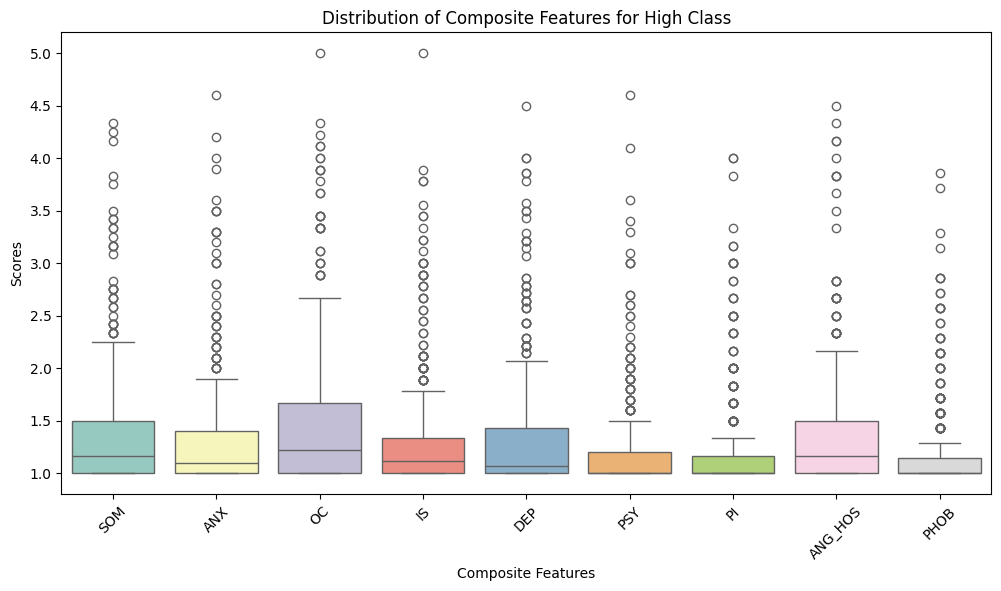

In [224]:
import seaborn as sns
import matplotlib.pyplot as plt

# Add the 'Label' column to the composite dataframe for filtering
df_composite['Label'] = data['SCL_Label']

# Filter data by 'High' class
h_df3 = df_composite.loc[df_composite['Label'] == 'High']

# Plot the data for the 'High' class
plt.figure(figsize=(12, 6))
sns.boxplot(data=h_df3.drop(columns=['Label']), palette="Set3")
plt.title("Distribution of Composite Features for High Class")
plt.ylabel("Scores")
plt.xlabel("Composite Features")
plt.xticks(rotation=45)
plt.show()

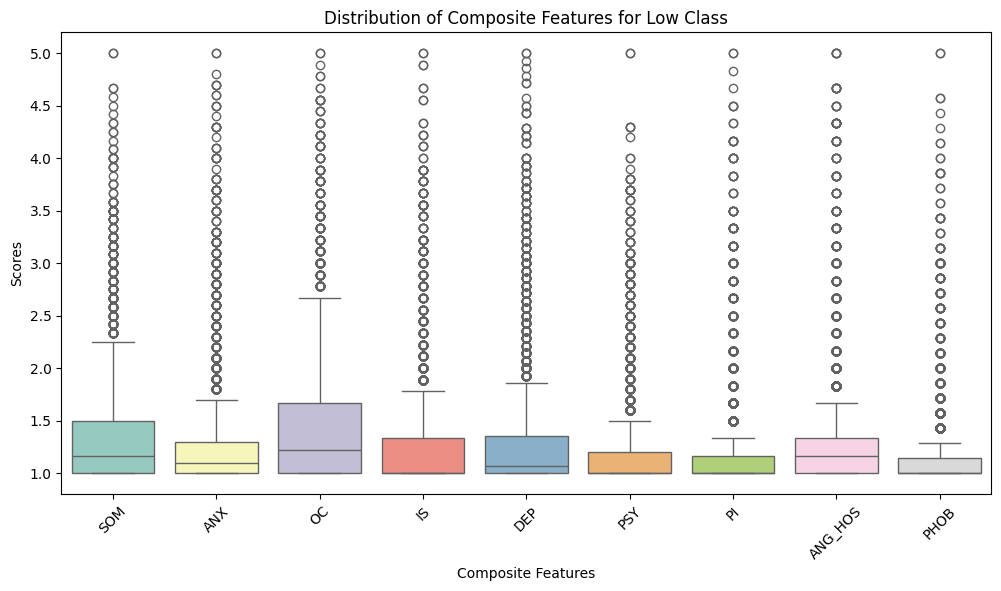

In [225]:
# Filter data by 'High' class
l_df3 = df_composite.loc[df_composite['Label'] == 'Low']

# Plot the data for the 'High' class
plt.figure(figsize=(12, 6))
sns.boxplot(data=l_df3.drop(columns=['Label']), palette="Set3")
plt.title("Distribution of Composite Features for Low Class")
plt.ylabel("Scores")
plt.xlabel("Composite Features")
plt.xticks(rotation=45)
plt.show()

In [226]:
df_composite

,SOM,ANX,OC,IS,DEP,PSY,PI,ANG_HOS,PHOB,Label
0,1.250000,1.3,1.333333,1.222222,1.142857,1.0,1.166667,1.000000,1.000000,NaN
1,1.000000,1.0,1.111111,1.000000,1.000000,1.0,1.000000,1.000000,1.000000,Low
2,2.833333,3.8,3.000000,3.222222,4.000000,3.2,3.333333,3.500000,2.571429,Low
3,1.000000,1.0,1.000000,1.000000,1.000000,1.0,1.000000,1.000000,1.000000,High
4,3.416667,3.8,4.111111,3.777778,3.714286,3.6,3.500000,3.500000,3.714286,Low
...,...,...,...,...,...,...,...,...,...,...
5103,1.166667,1.0,1.111111,1.000000,1.000000,1.0,1.000000,1.000000,1.000000,Low
5104,1.583333,1.2,1.333333,1.333333,1.214286,1.0,1.000000,1.333333,1.428571,Low
5105,1.000000,1.0,1.000000,1.000000,1.000000,1.0,1.000000,1.000000,1.000000,Low
5106,1.000000,1.0,1.222222,1.000000,1.071429,1.0,1.000000,1.000000,1.000000,Low


# Model Building

In [227]:
import torch
import torch.nn as nn
from torch.utils.data import TensorDataset, DataLoader
from sklearn.model_selection import train_test_split, KFold
from sklearn.metrics import (
    accuracy_score, f1_score, precision_score, recall_score, classification_report, confusion_matrix
)
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import itertools

In [228]:
# Step 1: Split Data into Train and Test Sets
X_train, X_test, y_train, y_test = train_test_split(
    df_composite.drop(columns=['Label']), 
    df_composite['Label'].map({'High': 1, 'Low': 0}), 
    test_size=0.3, 
    random_state=42
)

In [229]:
# Step 2: Convert Data to PyTorch Tensors
X_train_tensor = torch.from_numpy(X_train.values).float()
y_train_tensor = torch.from_numpy(y_train.values.ravel()).float().unsqueeze(1)
X_test_tensor = torch.from_numpy(X_test.values).float()
y_test_tensor = torch.from_numpy(y_test.values.ravel()).float().unsqueeze(1)

cleaned_indices = ~torch.isnan(y_train_tensor).squeeze()  # Identify non-NaN rows
X_train_tensor_cleaned = X_train_tensor[cleaned_indices]
y_train_tensor_cleaned = y_train_tensor[cleaned_indices]


In [230]:
# Step 3: Create Tensor Datasets and DataLoaders
batch_size = 64
train_dataset = TensorDataset(X_train_tensor_cleaned, y_train_tensor_cleaned)
train_loader = DataLoader(train_dataset, batch_size=batch_size)

test_dataset = TensorDataset(X_test_tensor, y_test_tensor)
test_loader = DataLoader(test_dataset, batch_size=batch_size)


In [231]:
# Step 4: Define Neural Network Architecture
class PsychologicalDistressModel(nn.Module):
    def __init__(self, input_dim, hidden_layer1=300, hidden_layer2=100, output_dim=1):
        super(PsychologicalDistressModel, self).__init__()
        self.input_layer = nn.Linear(input_dim, hidden_layer1)
        self.hidden_layer1 = nn.Linear(hidden_layer1, hidden_layer2)
        self.output_layer = nn.Linear(hidden_layer2, output_dim)
        self.relu_activation = nn.ReLU()
        self.sigmoid_activation = nn.Sigmoid()
        self.dropout_layer = nn.Dropout(p=0.5)
        self.batch_norm1 = nn.BatchNorm1d(hidden_layer1)
        self.batch_norm2 = nn.BatchNorm1d(hidden_layer2)

    def forward(self, inputs):
        x = self.relu_activation(self.input_layer(inputs))
        x = self.batch_norm1(x)
        x = self.relu_activation(self.hidden_layer1(x))
        x = self.batch_norm2(x)
        x = self.dropout_layer(x)
        return self.sigmoid_activation(self.output_layer(x))

input_features = X_train.shape[1]
model = PsychologicalDistressModel(input_dim=input_features)

In [232]:
from torchsummary import summary

# Provide the input size (excluding the batch size, e.g., [input_features])
summary(model, input_size=(input_features,))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Linear-1                  [-1, 300]           3,000
              ReLU-2                  [-1, 300]               0
       BatchNorm1d-3                  [-1, 300]             600
            Linear-4                  [-1, 100]          30,100
              ReLU-5                  [-1, 100]               0
       BatchNorm1d-6                  [-1, 100]             200
           Dropout-7                  [-1, 100]               0
            Linear-8                    [-1, 1]             101
           Sigmoid-9                    [-1, 1]               0
Total params: 34,001
Trainable params: 34,001
Non-trainable params: 0
----------------------------------------------------------------
Input size (MB): 0.00
Forward/backward pass size (MB): 0.01
Params size (MB): 0.13
Estimated Total Size (MB): 0.14
---------------------------------------------

In [233]:
# Step 5: Define Loss Function, Optimizer, and Training Parameters
binary_cross_entropy_loss = nn.BCELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)
num_epochs = 10
num_folds = 5

# Define a function to calculate accuracy
def calculate_accuracy(predictions, targets):
    predicted_labels = torch.round(predictions)
    correct_predictions = (predicted_labels == targets).float()
    accuracy = correct_predictions.sum() / len(correct_predictions)
    return accuracy.item()



In [240]:
# Step 6: K-Fold Cross-Validation with Training and Validation Accuracy
training_losses, validation_losses = [], []
training_accuracies, validation_accuracies = [], []

for fold, (train_indices, validation_indices) in enumerate(kfold.split(train_dataset)):
    print(f"Fold {fold + 1}/{num_folds}")
    train_subset = torch.utils.data.Subset(train_dataset, train_indices)
    validation_subset = torch.utils.data.Subset(train_dataset, validation_indices)
    train_loader_fold = DataLoader(train_subset, batch_size=batch_size)
    validation_loader_fold = DataLoader(validation_subset, batch_size=batch_size)

    for epoch in range(num_epochs):
        model.train()
        epoch_train_loss, epoch_train_accuracy = 0, 0

        for batch_inputs, batch_targets in train_loader_fold:
            optimizer.zero_grad()
            train_predictions = model(batch_inputs)
            train_loss = binary_cross_entropy_loss(train_predictions, batch_targets)
            train_loss.backward()
            optimizer.step()
            epoch_train_loss += train_loss.item()
            epoch_train_accuracy += calculate_accuracy(train_predictions, batch_targets)

        epoch_train_loss /= len(train_loader_fold)
        epoch_train_accuracy /= len(train_loader_fold)
        training_losses.append(epoch_train_loss)
        training_accuracies.append(epoch_train_accuracy)

        model.eval()
        epoch_val_loss, epoch_val_accuracy = 0, 0

        with torch.no_grad():
            for batch_inputs, batch_targets in validation_loader_fold:
                validation_predictions = model(batch_inputs)
                validation_loss = binary_cross_entropy_loss(validation_predictions, batch_targets)
                epoch_val_loss += validation_loss.item()
                epoch_val_accuracy += calculate_accuracy(validation_predictions, batch_targets)

        epoch_val_loss /= len(validation_loader_fold)
        epoch_val_accuracy /= len(validation_loader_fold)
        validation_losses.append(epoch_val_loss)
        validation_accuracies.append(epoch_val_accuracy)

        print(f"Epoch {epoch + 1}/{num_epochs}, Fold {fold + 1}/{num_folds}")
        print(f"Train Loss: {epoch_train_loss:.4f}, Train Accuracy: {epoch_train_accuracy:.4f}")
        print(f"Validation Loss: {epoch_val_loss:.4f}, Validation Accuracy: {epoch_val_accuracy:.4f}")


Fold 1/5
Epoch 1/10, Fold 1/5
Train Loss: 0.2902, Train Accuracy: 0.9135
Validation Loss: 0.5502, Validation Accuracy: 0.9065
Epoch 2/10, Fold 1/5
Train Loss: 0.2847, Train Accuracy: 0.9111
Validation Loss: 0.5517, Validation Accuracy: 0.9065
Epoch 3/10, Fold 1/5
Train Loss: 0.2879, Train Accuracy: 0.9122
Validation Loss: 0.5523, Validation Accuracy: 0.9065
Epoch 4/10, Fold 1/5
Train Loss: 0.2882, Train Accuracy: 0.9115
Validation Loss: 0.5545, Validation Accuracy: 0.9065
Epoch 5/10, Fold 1/5
Train Loss: 0.2869, Train Accuracy: 0.9132
Validation Loss: 0.6847, Validation Accuracy: 0.9052
Epoch 6/10, Fold 1/5
Train Loss: 0.2812, Train Accuracy: 0.9129
Validation Loss: 0.6891, Validation Accuracy: 0.9052
Epoch 7/10, Fold 1/5
Train Loss: 0.2807, Train Accuracy: 0.9129
Validation Loss: 0.6828, Validation Accuracy: 0.9052
Epoch 8/10, Fold 1/5
Train Loss: 0.2848, Train Accuracy: 0.9125
Validation Loss: 0.6850, Validation Accuracy: 0.9052
Epoch 9/10, Fold 1/5
Train Loss: 0.2790, Train Accuracy

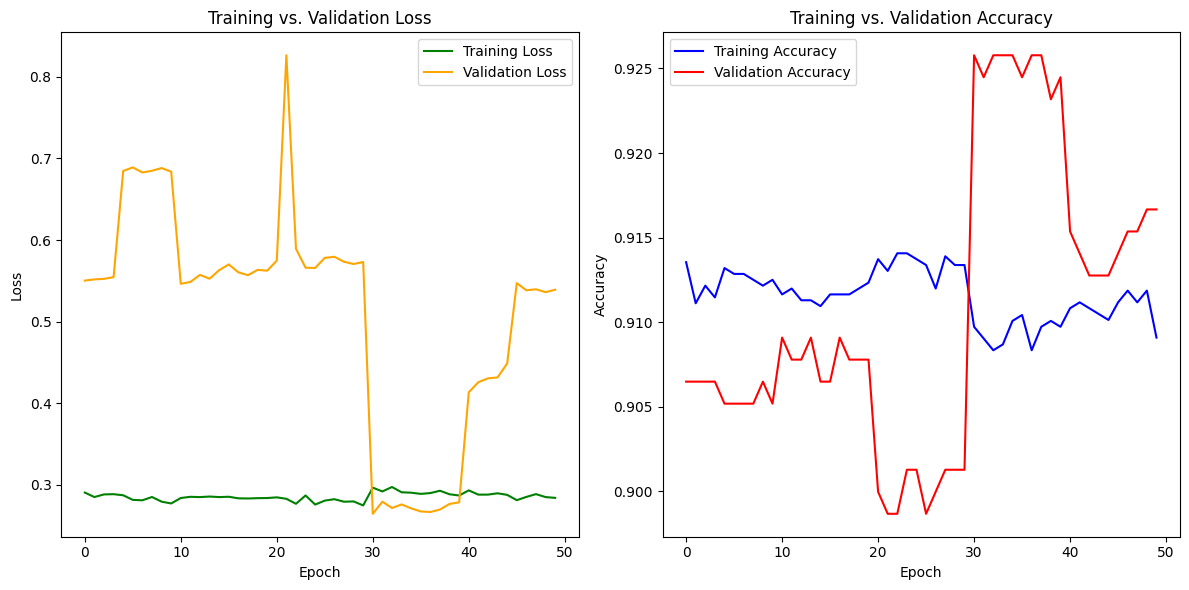

In [241]:
# Step 7: Plot Training and Validation Metrics
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(range(len(training_losses)), training_losses, label="Training Loss", color="green")
plt.plot(range(len(validation_losses)), validation_losses, label="Validation Loss", color="orange")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.title("Training vs. Validation Loss")
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(range(len(training_accuracies)), training_accuracies, label="Training Accuracy", color="blue")
plt.plot(range(len(validation_accuracies)), validation_accuracies, label="Validation Accuracy", color="red")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.title("Training vs. Validation Accuracy")
plt.legend()
plt.tight_layout()
plt.show()


In [242]:
# Step 8: Save the Model
torch.save(model, "psychological_distress_model.pth")

Accuracy: 0.8923679060665362
F1 Score: 0.0
Precision: 0.0
Recall: 0.0

Classification Report:
               precision    recall  f1-score   support

         0.0       0.90      0.99      0.94      1380
         1.0       0.00      0.00      0.00       153

    accuracy                           0.89      1533
   macro avg       0.45      0.50      0.47      1533
weighted avg       0.81      0.89      0.85      1533



/var/folders/mf/6c6r69vs6xb7_882kknxt6wh0000gs/T/ipykernel_59901/2736123793.py:2: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  loaded_model = torch.load("psychological_dist

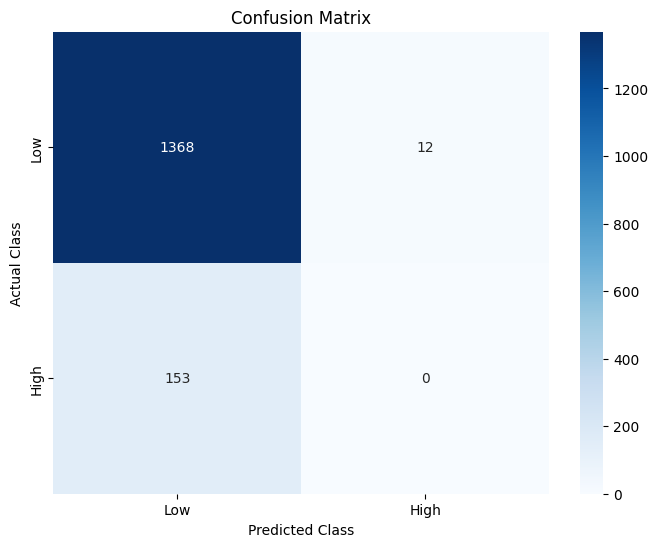

In [243]:
# Step 9: Model Evaluation
loaded_model = torch.load("psychological_distress_model.pth")
loaded_model.eval()

predicted_labels_list = []
with torch.no_grad():
    for test_inputs, _ in test_loader:
        test_predictions = loaded_model(test_inputs)
        predicted_labels = torch.round(test_predictions)
        predicted_labels_list.append(predicted_labels.numpy())

# Flatten the predictions
predicted_labels_flat = np.concatenate(predicted_labels_list).squeeze()
actual_labels_test = y_test.values

# Step 10: Define Evaluation Function
def evaluate_model_performance(true_labels, predicted_labels):
    print("Accuracy:", accuracy_score(true_labels, predicted_labels))
    print("F1 Score:", f1_score(true_labels, predicted_labels))
    print("Precision:", precision_score(true_labels, predicted_labels))
    print("Recall:", recall_score(true_labels, predicted_labels))
    print("\nClassification Report:\n", classification_report(true_labels, predicted_labels))
    confusion_mat = confusion_matrix(true_labels, predicted_labels)
    plt.figure(figsize=(8, 6))
    sns.heatmap(confusion_mat, annot=True, fmt="d", cmap="Blues", 
                xticklabels=["Low", "High"], yticklabels=["Low", "High"])
    plt.xlabel("Predicted Class")
    plt.ylabel("Actual Class")
    plt.title("Confusion Matrix")
    plt.show()

evaluate_model_performance(actual_labels_test, predicted_labels_flat)


# Feature Importance

In [244]:
import shap
import torch
import numpy as np
import matplotlib.pyplot as plt

# Step 1: Load the Model
model = torch.load("psychological_distress_model.pth")
model.eval()

# Step 2: Prepare the Dataset
X_test_tensor = torch.from_numpy(X_test.values).float()

# Convert tensor to numpy for SHAP analysis
X_test_numpy = X_test_tensor.numpy()

# Step 3: Define a Wrapper for SHAP
# SHAP requires a callable model; we'll create a wrapper for the PyTorch model
def model_wrapper(inputs):
    inputs_tensor = torch.from_numpy(inputs).float()
    with torch.no_grad():
        outputs = model(inputs_tensor)
    return outputs.numpy()

# Step 4: Initialize SHAP Explainer
explainer = shap.Explainer(model_wrapper, X_test_numpy)
shap_values = explainer(X_test_numpy)


/var/folders/mf/6c6r69vs6xb7_882kknxt6wh0000gs/T/ipykernel_59901/4093341619.py:7: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model = torch.load("psychological_distress_mo

# Composite Category Meanings

- **SOM (Somatization)**: Measures physical symptoms caused by psychological distress (e.g., headaches, muscle pain).
- **ANX (Anxiety)**: Evaluates symptoms of nervousness, fear, and restlessness.
- **OC (Obsessive-Compulsive)**: Assesses tendencies like repetitive behaviors and intrusive thoughts.
- **IS (Interpersonal Sensitivity)**: Captures feelings of inadequacy and discomfort in relationships.
- **DEP (Depression)**: Indicates symptoms of sadness, hopelessness, and lack of energy.
- **PSY (Psychoticism)**: Measures abnormal thoughts, delusions, and social detachment.
- **PI (Paranoid Ideation)**: Reflects distrust and suspicion of others.
- **ANG_HOS (Anger-Hostility)**: Captures feelings of irritability and aggressive impulses.
- **PHOB (Phobic Anxiety)**: Assesses irrational fears and avoidance behaviors.


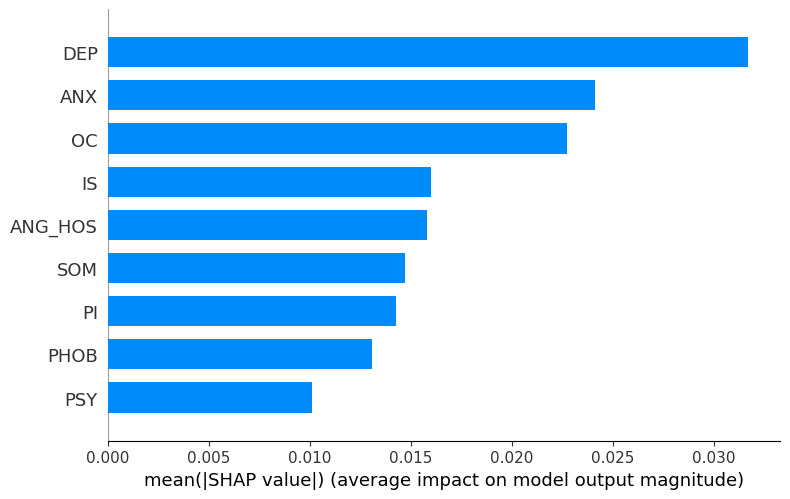

In [245]:
# Step 5: Visualize Feature Importance
feature_names = X_test.columns.tolist()
shap.summary_plot(shap_values, X_test_numpy, feature_names=feature_names, plot_type="bar")

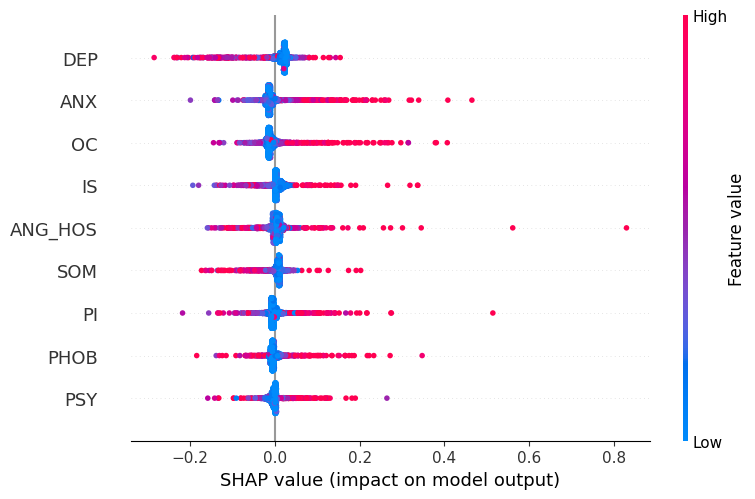

In [246]:
shap.summary_plot(shap_values, X_test_numpy, feature_names=feature_names)
